In [23]:
from scipy.io import loadmat
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
H = loadmat('data/H.mat')['H']
x = loadmat('data/x.mat')['x']
G = loadmat('data/G.mat')['G']

In [17]:
hx = H@x
y = hx + np.random.normal(size = hx.shape, scale=1)

In [29]:
y_view = y.reshape((90,180), order='F')
x_view = x.reshape((90,90), order='F')

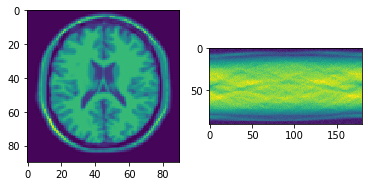

In [30]:
fg , ax = plt.subplots(1,2)
ax[0].imshow(x_view)
ax[1].imshow(y_view)

# Part 2

In [31]:
def f(x, y ,r, lambda_) : 
    return(1/2 * np.linalg.norm(H@x - y, ord=2) + labmda_ * r(x))

In [44]:
def grad_f(x) : 
    return(H.T @ H @ x - H.T @ y + lambda_ * G.T @ grad_psi(G @ x))
delta = 1e-2
def grad_psi(u, delta=delta): 
    return(u / ( delta ** 2 * np.sqrt(1 + u ** 2 / ( delta ** 2 ))))

def h(x): 
    
    return(f(x_n) + np.dot(grad_f(x_n), x - x_n) + 1/2 * np.sqrt(np.dot(x - x_n, A @ (x - x_n))))

In [37]:
from scipy.sparse.linalg  import LinearOperator

In [42]:
def delta(x):
    return np.diag(grad_psi(x)/x)
lambda_ = 1e-3
def A_x(x): 
    return(H.T.dot((H.dot(x))) + lambda_ * G.T @ delta(G @ x) @ G)

In [45]:
M, N = 90 * 180, 90 * 90 
norm_a = LinearOperator((M,N),matvec = A_x)

TypeError: 'float' object is not callable